# 1 layer feedforward

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from scripts import dlc_rnn
from rnn_utils import *

model = dlc_rnn.LSTM1Dense1(mpath='/home/ishan/honors_thesis/github/models/fly_1layer_128Units_32Batchsize_Stateful_Model_0.hdf5', gputouse=2)
#model = model.model
np.random.seed(0)

from sklearn.externals.joblib import dump, load
scaler = load('/home/ishan/honors_thesis/Xscaler_val.bin')

num_angles=30

Instructions for updating:
Use tf.cast instead.


In [3]:
num_forward = 10000

file = '/home/ishan/honors_thesis/nongithub/joint_angles/ja_101012_134451.h5'
ja = h5py.File(file)['joint_angles']
X_drive = np.array(ja)[np.newaxis, 2000:12000, :]

X_drive_ = np.zeros((X_drive.shape[1]*32, 1,X_drive.shape[2]))
X_drive_[::32,0] = X_drive[0]

preds = model.model.predict(X_drive_, batch_size=32, verbose=1)
preds = preds[::32]

ff_normed = np.empty((num_forward,30))
inp_net = np.zeros((32,1,30))
inp_net[0,0] = preds[-1]
ff_pred = model.model.predict(inp_net, verbose=1)
ff_normed[0] = ff_pred[0,0]
for tp in range(1,num_forward):
    inp_net[0,0] = ff_normed[tp-1]
    ff_pred = model.model.predict(inp_net)
    ff_normed[tp] = ff_pred[0,0]

32/32 [==============================] - 0s 31us/step


In [20]:
X_drive.shape, preds.shape, ff.shape

((1, 10000, 30), (10000, 1, 30), (10000, 30))

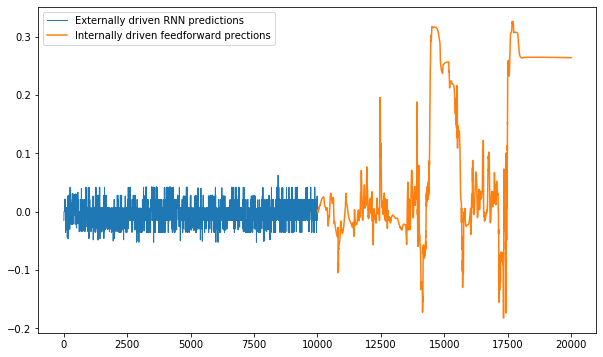

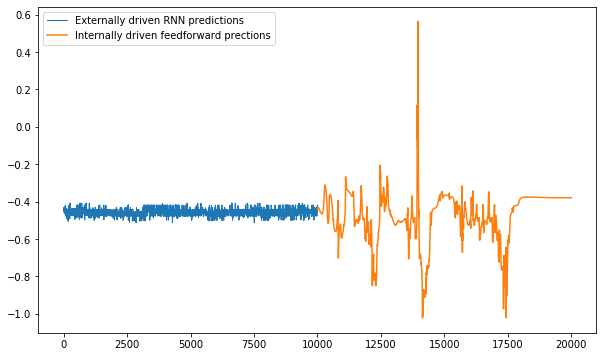

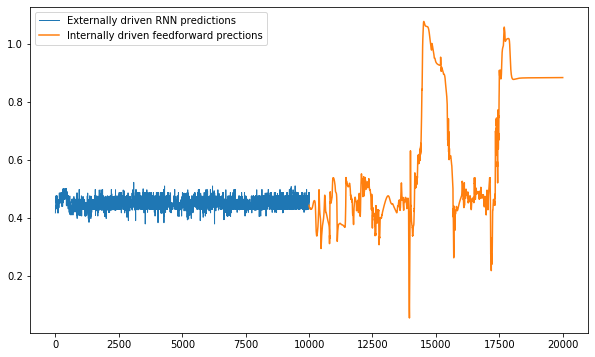

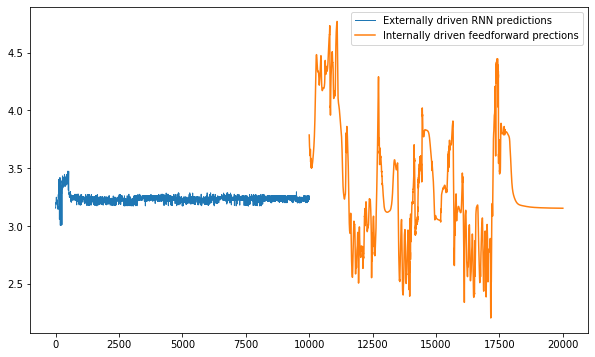

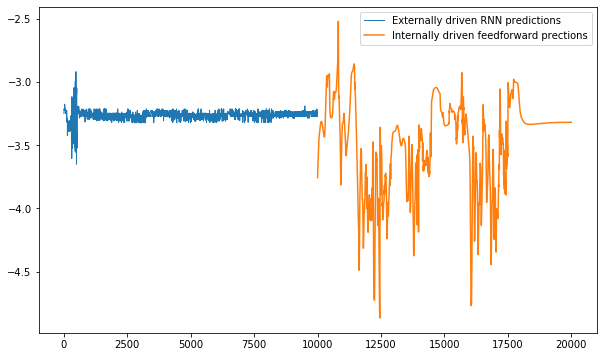

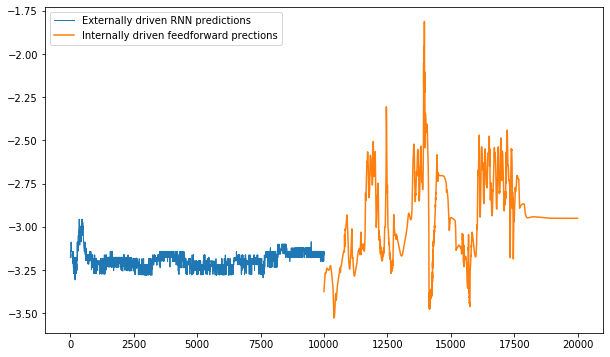

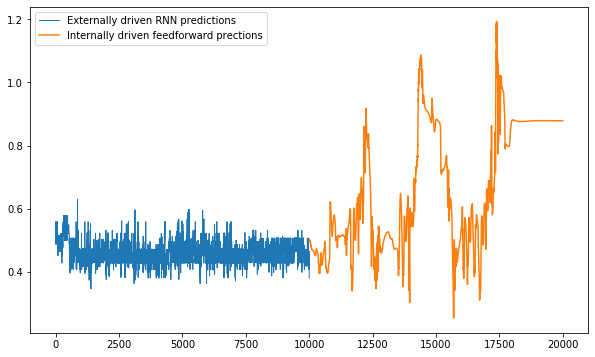

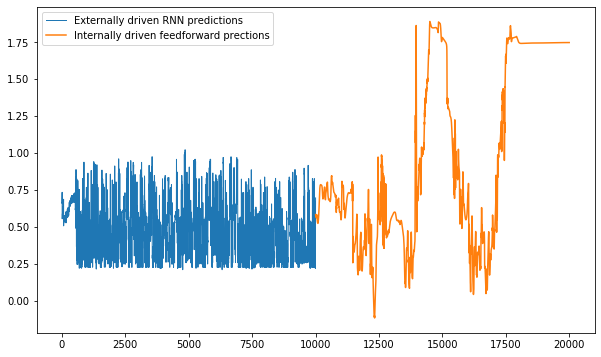

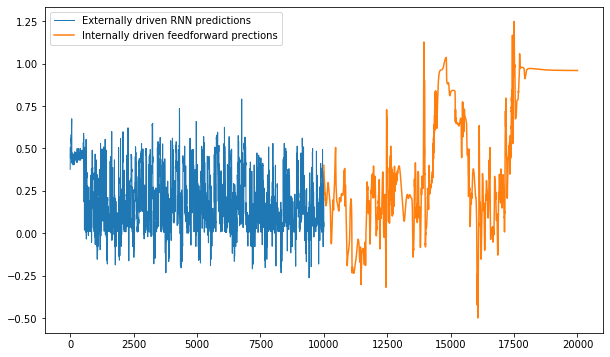

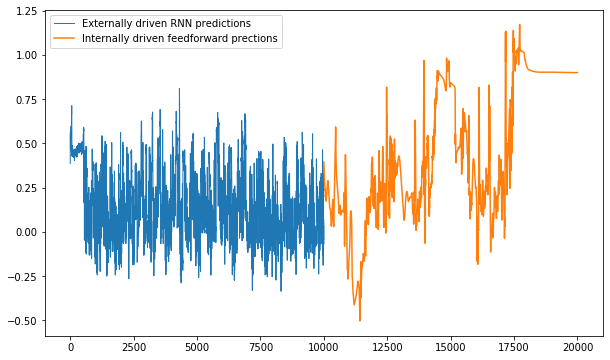

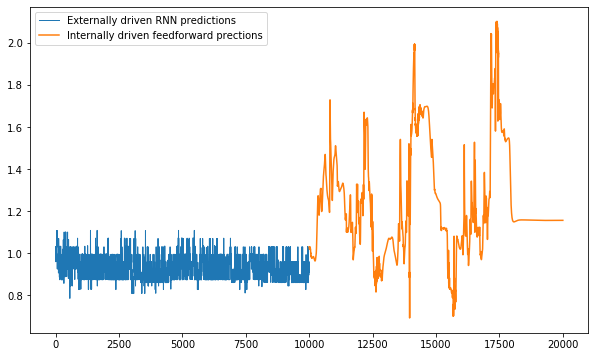

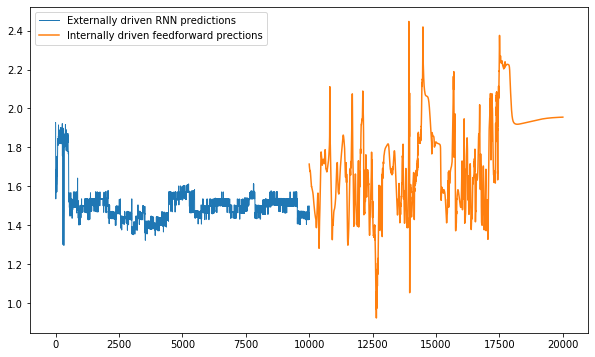

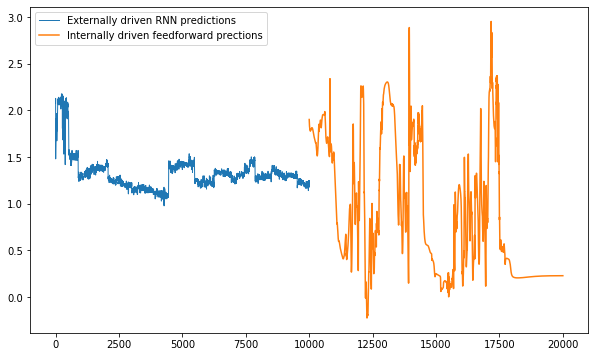

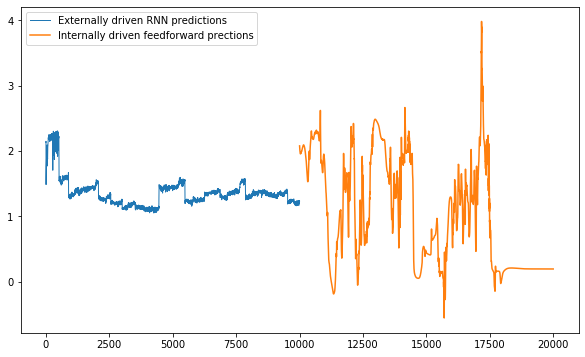

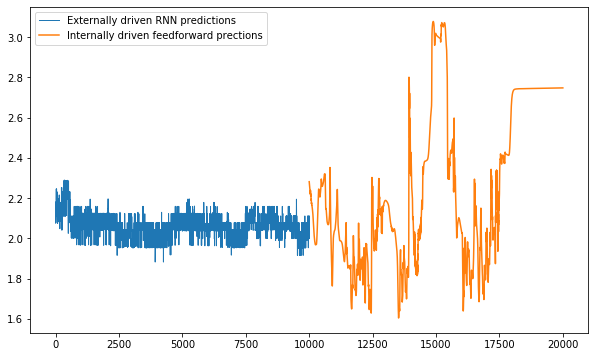

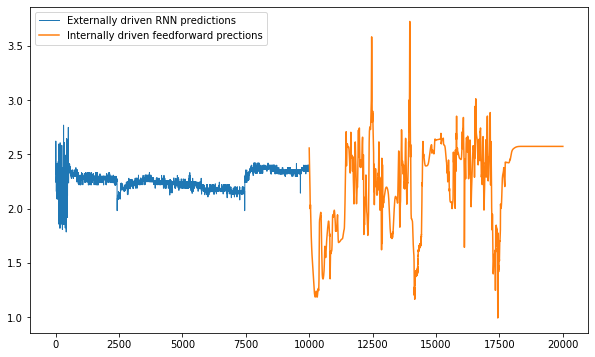

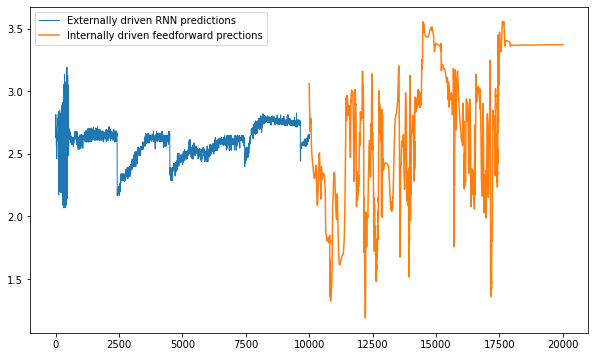

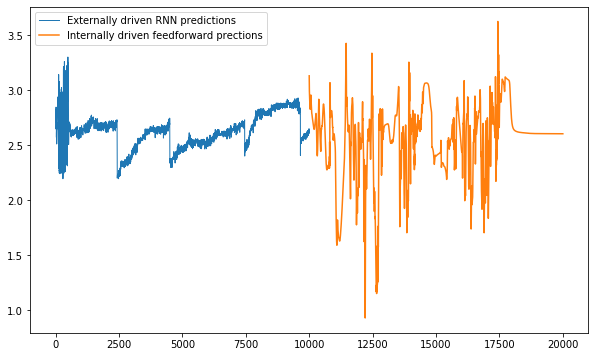

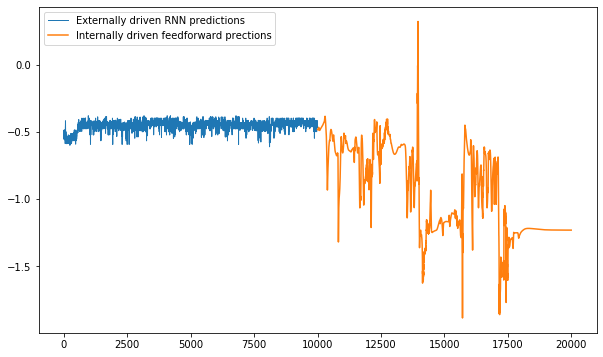

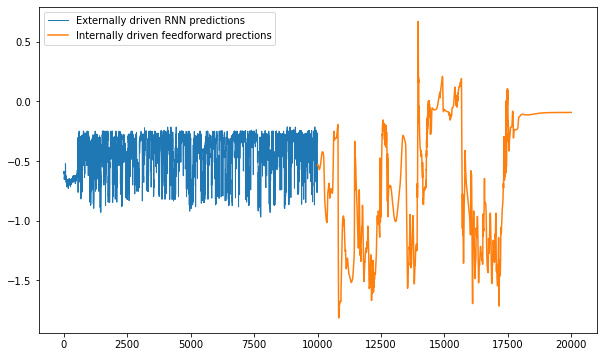

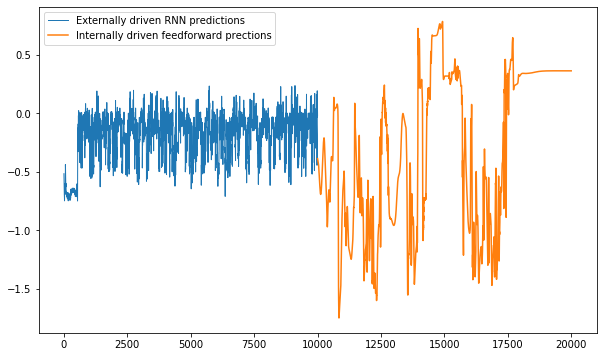

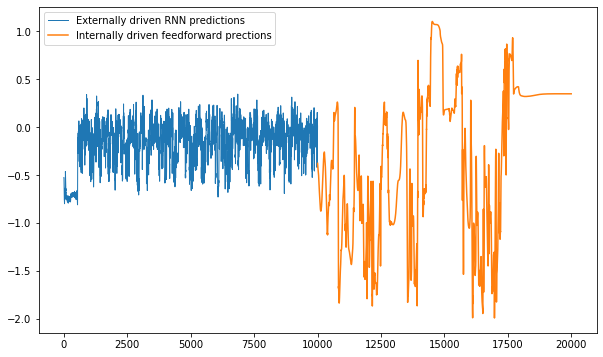

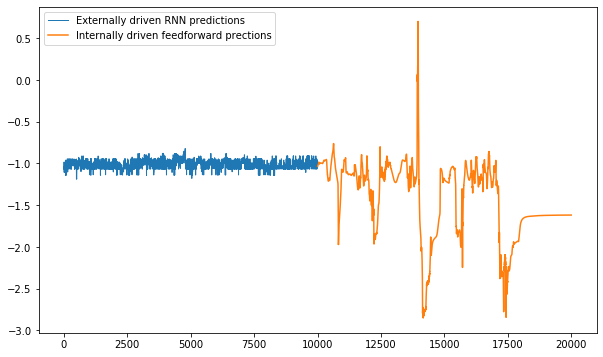

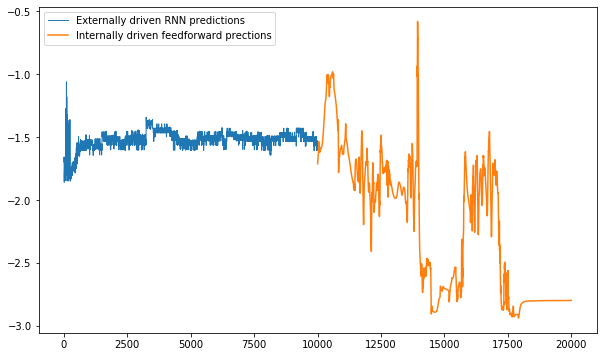

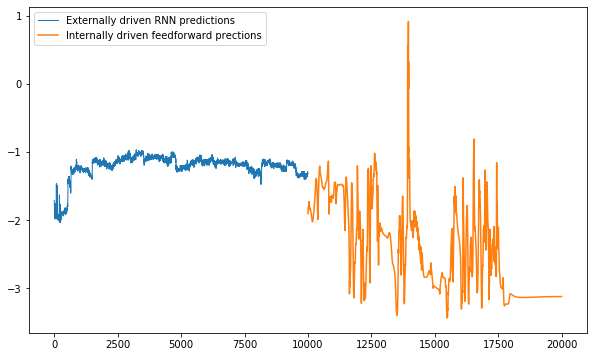

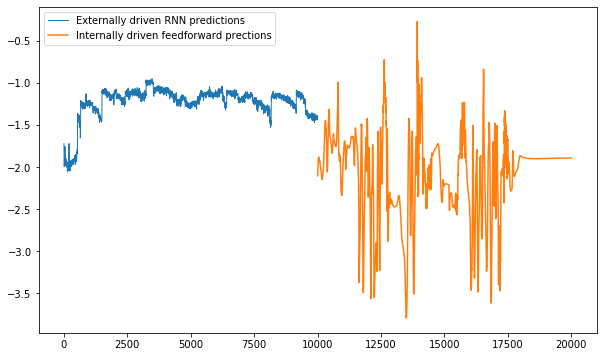

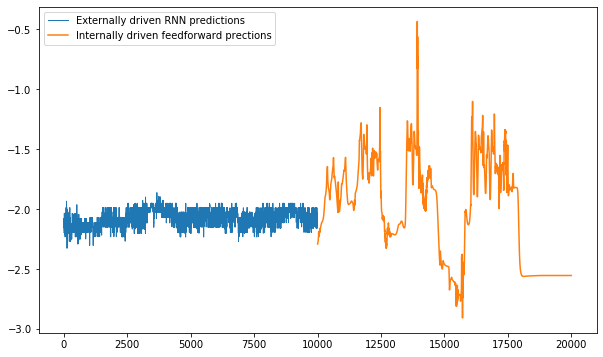

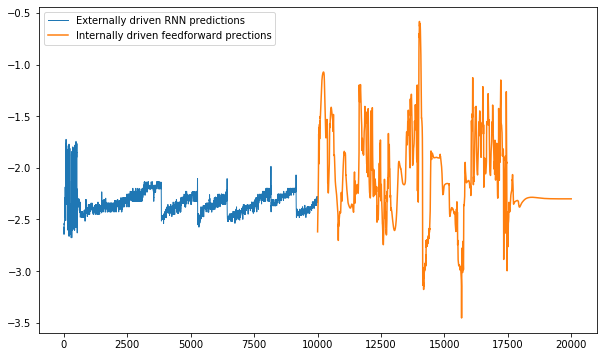

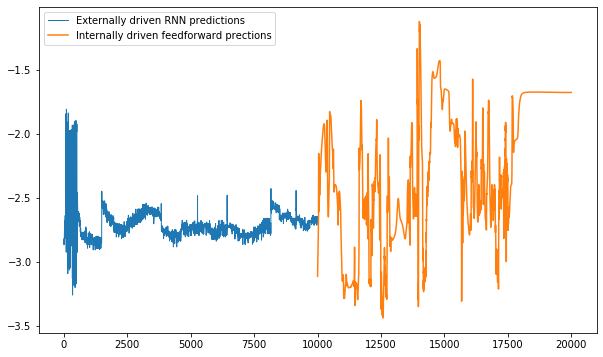

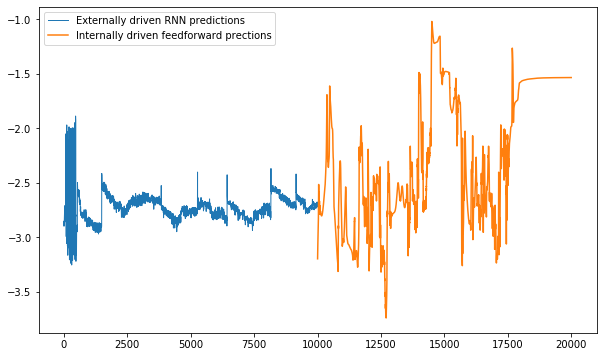

In [38]:
for ang in range(30):
    ff = scaler.inverse_transform(ff_normed)
    preds = scaler.inverse_transform(preds)
    plt.figure(figsize=(10,6))
    plt.plot(np.arange(num_forward), X_drive[0,-num_forward:,ang],linewidth=1 ,label='Externally driven RNN predictions')
    plt.plot(np.arange(num_forward,2*num_forward), ff[:,ang], label='Internally driven feedforward prections'); #0th angle
    plt.legend()

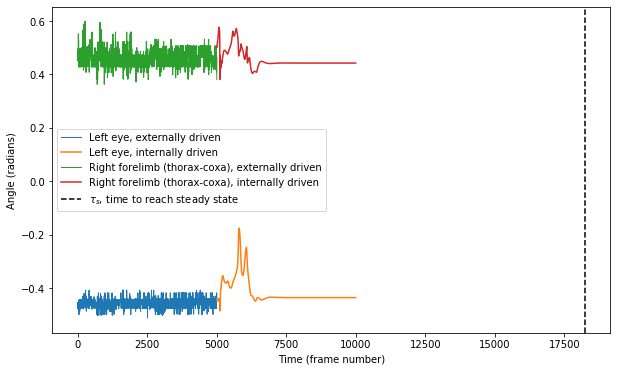

In [17]:
ang=1
ff = scaler.inverse_transform(ff_normed)
preds = scaler.inverse_transform(preds)
plt.figure(figsize=(10,6))
plt.plot(np.arange(num_forward), X_drive[0,-num_forward:,ang],linewidth=1 ,label='Left eye, externally driven')
plt.plot(np.arange(num_forward,2*num_forward), ff[:,ang], label='Left eye, internally driven'); #0th angle
plt.legend()
ang=6
plt.plot(np.arange(num_forward), X_drive[0,-num_forward:,ang],linewidth=1 ,label='Right forelimb (thorax-coxa), externally driven')
plt.plot(np.arange(num_forward,2*num_forward), ff[:,ang], label='Right forelimb (thorax-coxa), internally driven'); #0th angle
plt.axvline(18250, color='black', linestyle='dashed', label='$τ_s$, time to reach steady state')
plt.legend()
plt.xlabel('Time (frame number)')
plt.ylabel('Angle (radians)')
plt.savefig('steady_state_graph.png')

In [69]:
steady_state = np.array([np.around(ff[i],3) == np.around(ff[i-1],3) for i in range(1,ff.shape[0])])

In [62]:
steady_state[5862:]
steady_state.sum(axis=0)
steady_state[8250:].sum(axis=0)

[array([ True, False,  True, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False,  True, False, False, False, False, False, False,
        False, False,  True, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False,  True, False, False,
        False,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False,  True, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False]),
 array([False, False,  T

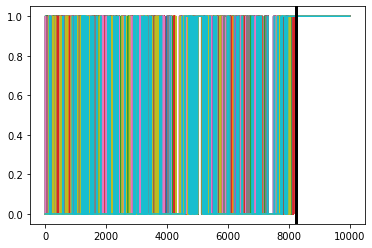

In [98]:
from scipy.signal import medfilt
for ang in range(num_angles):
    plt.plot(medfilt(steady_state[:,ang], 3))
plt.axvline(8250, color='black', linewidth=3)

[(10000, 1, 30), (1, 10000, 30), (320000, 1, 30), (10000, 30)]


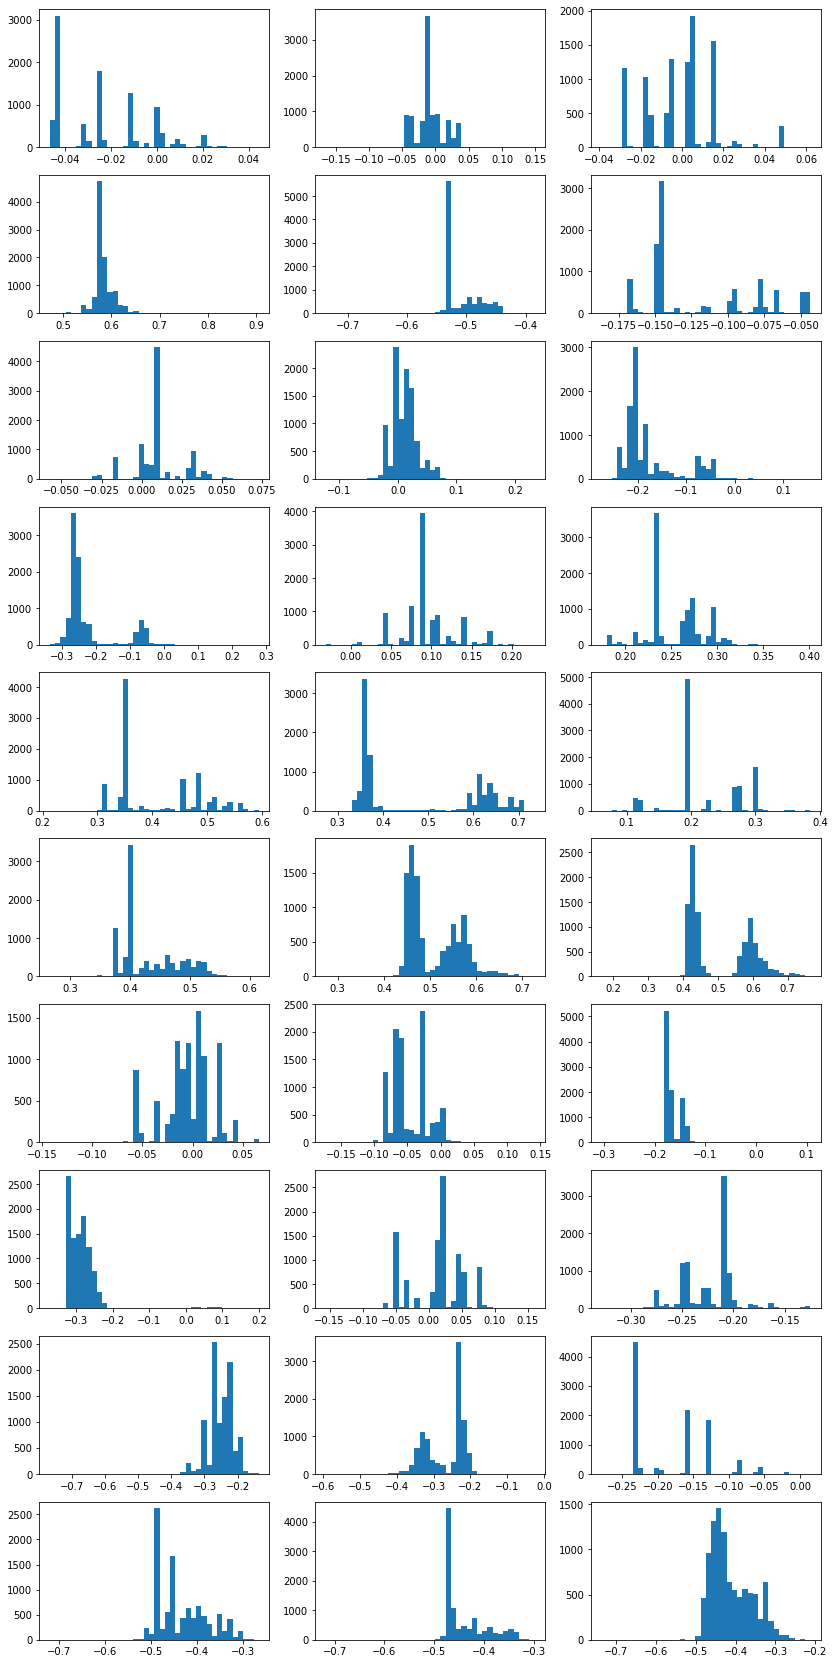

In [27]:
print(shape(preds, X_drive, X_drive_, ff))
diff = preds[:,0,:]-X_drive[0,:,:]
fig, axes = plt.subplots(10, 3, figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.hist(diff[:,ang],bins=40);

t:   0%|          | 0/15000 [00:00<?, ?it/s, now=None]

Moviepy - Building video /home/ishan/honors_thesis/github/feedforwardflies/1layer/feedforwardfly[134451].mp4.
Moviepy - Writing video /home/ishan/honors_thesis/github/feedforwardflies/1layer/feedforwardfly[134451].mp4



Moviepy - Done !
Moviepy - video ready /home/ishan/honors_thesis/github/feedforwardflies/1layer/feedforwardfly[134451].mp4


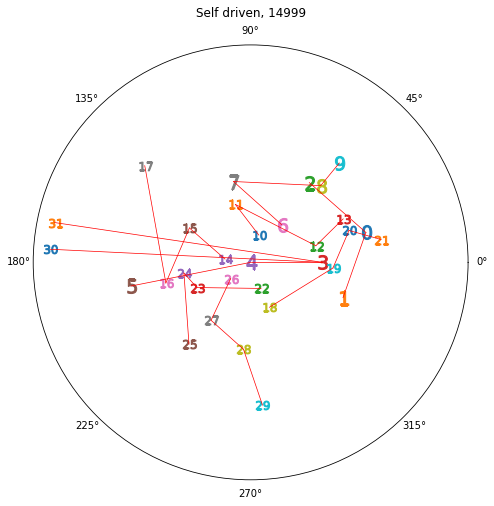

In [13]:
means = np.array([[145.4873612 , 133.85781315, 133.67147231, 126.58415065,
         97.8499675 ,  49.04866306, 115.03435667, 126.57664241,
        136.6654787 , 147.54284296, 104.14832639,  98.08537269,
         97.5099163 ,  93.44100222,  92.59418426,  80.12077111,
         67.43725833,  46.79131352, 115.27751259, 126.66277787,
        136.48709333, 147.22914222, 104.19417769,  98.32634593,
         97.87074148,  94.08399361,  92.70216287,  80.31333463,
         67.70918454,  47.12081435,  18.57976667,  18.75787278],
       [ 94.9058512 ,  78.1094025 , 111.35902611,  94.62192528,
         94.47558787,  93.8548138 , 103.76169704, 110.83637648,
        109.35607269, 113.65153019, 103.97928528, 118.41667648,
        121.39174278, 135.12658296, 103.38936426, 116.27441046,
        111.59319704, 120.60877898,  85.77009241,  78.37048722,
         79.6991313 ,  75.19082435,  85.21323407,  70.76826157,
         67.4492088 ,  53.65891204,  85.60276287,  72.56368139,
         76.95799972,  67.81673   ,  81.54497037, 106.54920185]])
x_means = means[0,:] - means[0,4]
y_means = means[1,:] - means[1,4]
mean_lngth = np.sqrt(x_means**2 + y_means**2)
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from tqdm import tqdm
try:
    tqdm._instances.clear()
except:
    pass
fps = 100
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
linewidth=0.7
color='red'
def make_frame(i):
    t = int(i*100)
    ax.clear()

    if t<5000:
        arr = preds.squeeze()[t+5000]
        ax.set_title('Externally driven, '+str(t))

    else:
        arr = ff[t-10000]
        ax.set_title('Self driven, '+str(t))
        
    ja_ = np.zeros(32)
    ja_[:30] = arr[:]
    ja_[30] = arr[3]
    ja_[31] = arr[4]
    ja_[3] = 0
    ja_[4] = 0
    for p in range(6, 9, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(10, 13, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(14, 17, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(18, 21, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(22, 25, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(26, 29, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    ax.plot([ja_[2],ja_[0]], [mean_lngth[2],mean_lngth[0]], linewidth=linewidth, color='r')
    ax.plot([ja_[1],ja_[0]], [mean_lngth[1],mean_lngth[0]], linewidth=linewidth, color='r')
    ax.plot([ja_[5],ja_[4]], [mean_lngth[5],mean_lngth[4]], linewidth=linewidth, color='r')
    ax.plot([ja_[4],ja_[3]], [mean_lngth[4],mean_lngth[3]], linewidth=linewidth, color='r')
    ax.plot([ja_[30],ja_[3]], [mean_lngth[30],mean_lngth[3]], linewidth=linewidth, color='r')
    ax.plot([ja_[31],ja_[3]], [mean_lngth[31],mean_lngth[3]], linewidth=linewidth, color='r')
    for i in range(32):
        ax.scatter(ja_[i], mean_lngth[i], marker='$' + str(i)+ '$', s=200)
    ax.set_yticklabels([])
    #ax.set_xticklabels([])
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    return mplfig_to_npimage(fig)
animation = VideoClip(make_frame, duration = 150)
animation.write_videofile('/home/ishan/honors_thesis/github/feedforwardflies/1layer/feedforwardfly[{}].mp4'.format(file[-9:-3]), fps=100, audio=False, threads=4)

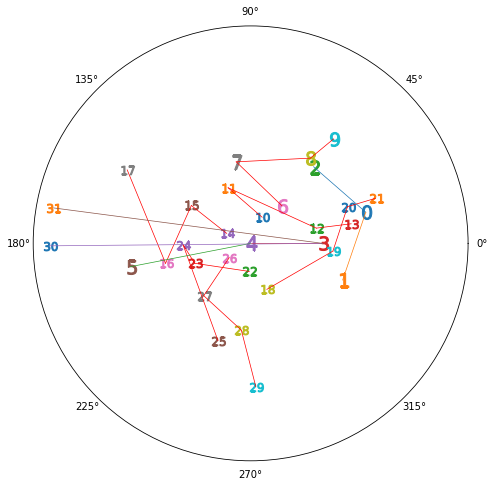

In [12]:
fig, ax = draw_skeleton(ff[-1])
#fig.savefig('/home/ishan/honors_thesis/github/feedforwardflies/1layer/steadystatefly2.png')

# 2 layer feedforward

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from scripts import dlc_rnn
from rnn_utils import *

model = dlc_rnn.LSTM2Dense1(mpath='/home/ishan/honors_thesis/github/models/fly_2layer_64Units_32Batchsize_Stateful_Model_0.hdf5', gputouse=2)
#model = model.model
np.random.seed(0)

from sklearn.externals.joblib import dump, load
scaler = load('/home/ishan/honors_thesis/Xscaler_val.bin')

num_angles=30

In [3]:
print(preds.shape, X_drive.shape, X_drive_.shape, ff.shape)
diff = preds[:,0,:]-X_drive[0,:,:]
fig, axes = plt.subplots(10, 3, figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.hist(diff[:,ang])#,bins=40);

NameError: name 'preds' is not defined

In [4]:
ja = h5py.File('/home/ishan/honors_thesis/nongithub/joint_angles/ja_101012_134451.h5')['joint_angles']
X_drive = np.array(ja)[np.newaxis, 2000:12000, :]

X_drive_ = np.zeros((X_drive.shape[1]*32, 1,X_drive.shape[2]))
X_drive_[::32,0] = X_drive[0]

preds = model.model.predict(X_drive_, batch_size=32, verbose=1)
preds = preds[::32]

ff_normed = np.empty((5000,30))
inp_net = np.zeros((32,1,30))
inp_net[0,0] = preds[-1]
ff_pred = model.model.predict(inp_net, verbose=1)
ff_normed[0] = ff_pred[0,0]
for tp in range(1,5000):
    inp_net[0,0] = ff_normed[tp-1]
    ff_pred = model.model.predict(inp_net)
    ff_normed[tp] = ff_pred[0,0]

32/32 [==============================] - 0s 48us/step


In [5]:
ff = scaler.inverse_transform(ff_normed)
preds = scaler.inverse_transform(preds)

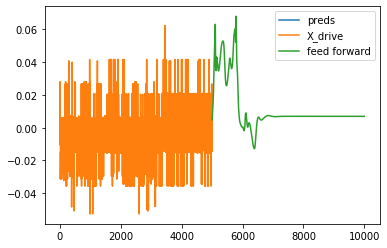

In [6]:
plt.figure()
plt.plot(np.arange(5000), preds[-5000:,0,0], label='preds')
plt.plot(np.arange(5000), X_drive[0,-5000:,0], label='X_drive')
plt.plot(np.arange(5000,10000), ff[:,0], label='feed forward'); #0th angle
plt.legend()

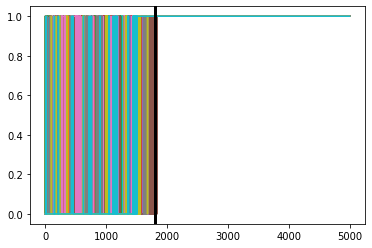

In [14]:
steady_state = np.array([np.around(ff[i],3) == np.around(ff[i-1],3) for i in range(1,ff.shape[0])])

from scipy.signal import medfilt
for ang in range(num_angles):
    plt.plot(medfilt(steady_state[:,ang], 3))
plt.axvline(1800, color='black', linewidth=3)

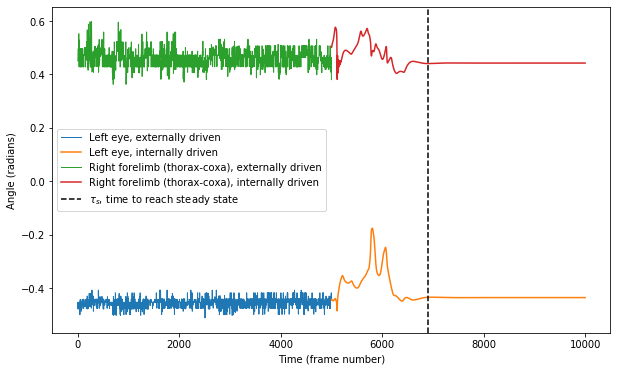

In [16]:
ang=1
num_forward = 5000
ff = scaler.inverse_transform(ff_normed)
preds = scaler.inverse_transform(preds)
plt.figure(figsize=(10,6))
plt.plot(np.arange(num_forward), X_drive[0,-num_forward:,ang],linewidth=1 ,label='Left eye, externally driven')
plt.plot(np.arange(num_forward,2*num_forward), ff[:,ang], label='Left eye, internally driven'); #0th angle
plt.legend()
ang=6
plt.plot(np.arange(num_forward), X_drive[0,-num_forward:,ang],linewidth=1 ,label='Right forelimb (thorax-coxa), externally driven')
plt.plot(np.arange(num_forward,2*num_forward), ff[:,ang], label='Right forelimb (thorax-coxa), internally driven'); #0th angle
plt.axvline(num_forward+1900, color='black', linestyle='dashed', label='$τ_s$, time to reach steady state')
plt.legend()
plt.xlabel('Time (frame number)')
plt.ylabel('Angle (radians)')
plt.savefig('steady_state_graph[2l].png')

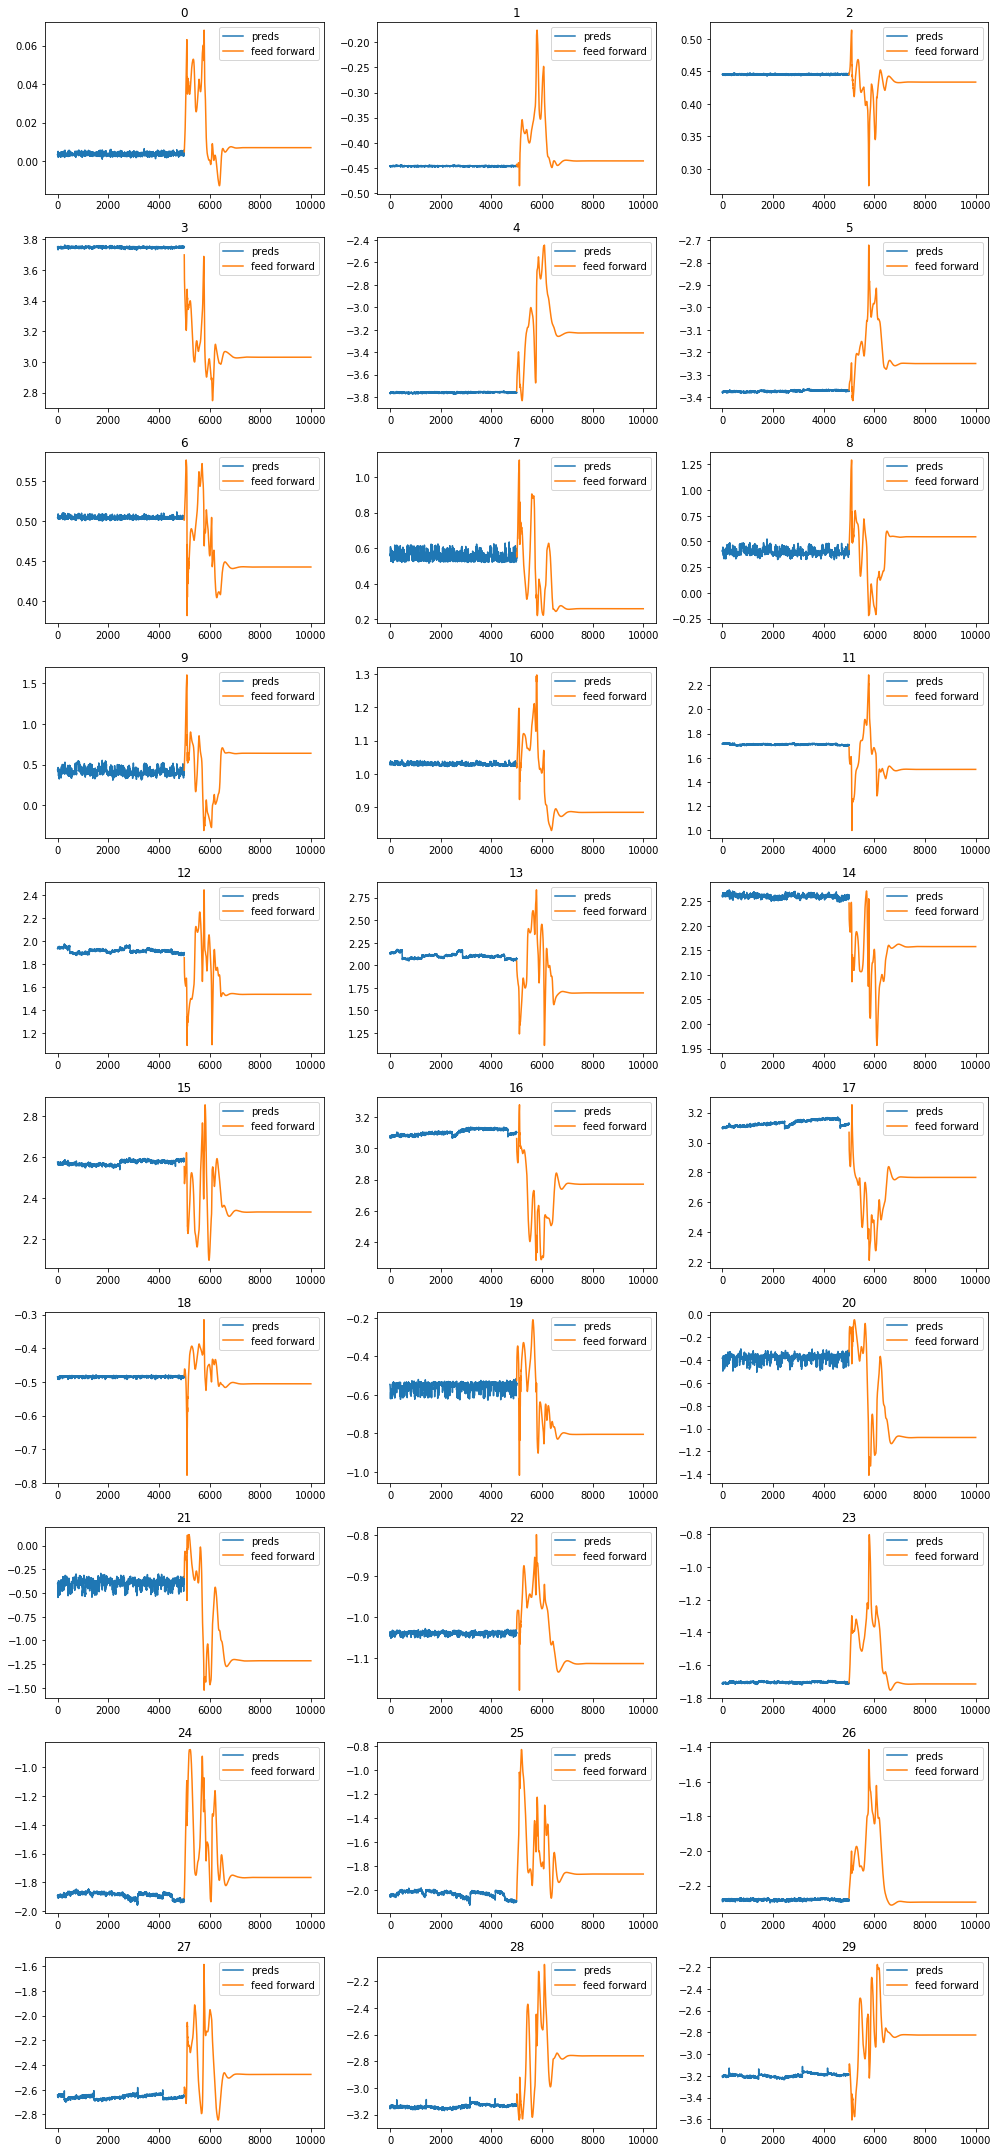

In [13]:
preds_rewind = -5000
fig, axes = plt.subplots(10,3,figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.plot(np.arange(-preds_rewind), preds[preds_rewind:,0,ang], label='preds')
    ax.plot(np.arange(-preds_rewind,ff.shape[0]-preds_rewind), ff[:,ang], label='feed forward')
    ax.set_title(str(ang))
    ax.legend()
plt.tight_layout()

In [106]:
#scaler.inverse_transform(ff.mean(axis=0).mean(axis=0))

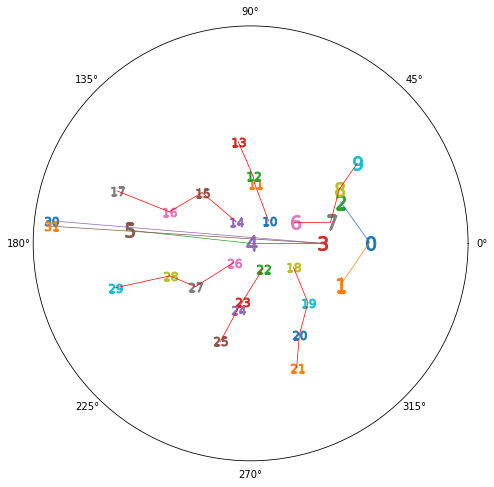

In [8]:
fig, ax = draw_skeleton(ff[-1])
#fig.savefig('steadystatefly.png')

t:   0%|          | 0/10000 [00:00<?, ?it/s, now=None]

Moviepy - Building video feedforwardfly[134451].mp4.
Moviepy - Writing video feedforwardfly[134451].mp4



Moviepy - Done !
Moviepy - video ready feedforwardfly[134451].mp4


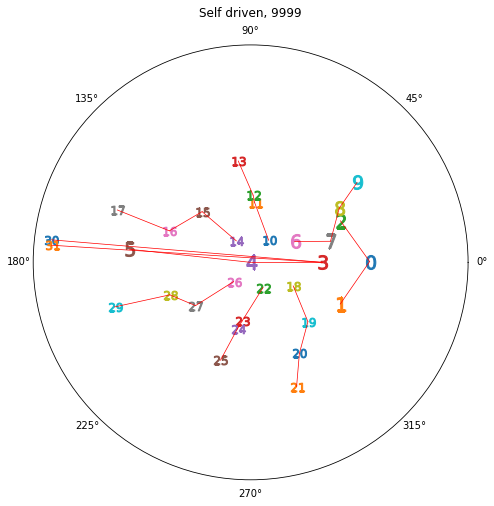

In [9]:
means = np.array([[145.4873612 , 133.85781315, 133.67147231, 126.58415065,
         97.8499675 ,  49.04866306, 115.03435667, 126.57664241,
        136.6654787 , 147.54284296, 104.14832639,  98.08537269,
         97.5099163 ,  93.44100222,  92.59418426,  80.12077111,
         67.43725833,  46.79131352, 115.27751259, 126.66277787,
        136.48709333, 147.22914222, 104.19417769,  98.32634593,
         97.87074148,  94.08399361,  92.70216287,  80.31333463,
         67.70918454,  47.12081435,  18.57976667,  18.75787278],
       [ 94.9058512 ,  78.1094025 , 111.35902611,  94.62192528,
         94.47558787,  93.8548138 , 103.76169704, 110.83637648,
        109.35607269, 113.65153019, 103.97928528, 118.41667648,
        121.39174278, 135.12658296, 103.38936426, 116.27441046,
        111.59319704, 120.60877898,  85.77009241,  78.37048722,
         79.6991313 ,  75.19082435,  85.21323407,  70.76826157,
         67.4492088 ,  53.65891204,  85.60276287,  72.56368139,
         76.95799972,  67.81673   ,  81.54497037, 106.54920185]])
x_means = means[0,:] - means[0,4]
y_means = means[1,:] - means[1,4]
mean_lngth = np.sqrt(x_means**2 + y_means**2)
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from tqdm import tqdm
try:
    tqdm._instances.clear()
except:
    pass
fps = 100
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
linewidth=0.7
color='red'
def make_frame(i):
    t = int(i*100)
    ax.clear()

    if t<5000:
        arr = preds.squeeze()[t+5000]
        ax.set_title('Externally driven, '+str(t))

    else:
        arr = ff[t-5000]
        ax.set_title('Self driven, '+str(t))
        
    ja_ = np.zeros(32)
    ja_[:30] = arr[:]
    ja_[30] = arr[3]
    ja_[31] = arr[4]
    ja_[3] = 0
    ja_[4] = 0
    for p in range(6, 9, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(10, 13, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(14, 17, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(18, 21, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(22, 25, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(26, 29, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    ax.plot([ja_[2],ja_[0]], [mean_lngth[2],mean_lngth[0]], linewidth=linewidth, color='r')
    ax.plot([ja_[1],ja_[0]], [mean_lngth[1],mean_lngth[0]], linewidth=linewidth, color='r')
    ax.plot([ja_[5],ja_[4]], [mean_lngth[5],mean_lngth[4]], linewidth=linewidth, color='r')
    ax.plot([ja_[4],ja_[3]], [mean_lngth[4],mean_lngth[3]], linewidth=linewidth, color='r')
    ax.plot([ja_[30],ja_[3]], [mean_lngth[30],mean_lngth[3]], linewidth=linewidth, color='r')
    ax.plot([ja_[31],ja_[3]], [mean_lngth[31],mean_lngth[3]], linewidth=linewidth, color='r')
    for i in range(32):
        ax.scatter(ja_[i], mean_lngth[i], marker='$' + str(i)+ '$', s=200)
    ax.set_yticklabels([])
    #ax.set_xticklabels([])
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    return mplfig_to_npimage(fig)
animation = VideoClip(make_frame, duration = 100)
animation.write_videofile('feedforwardfly[134451].mp4', fps=100, audio=False, threads=4)

In [ ]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

fps = 100
def make_frame(i):
    t = np.arange(100)[int(i*fps)]
    fig, ax = draw_skeleton(ff[t])
    
    return mplfig_to_npimage(fig)
animation = VideoClip(make_frame, duration = 1)
animation.write_gif('test+overlay.gif', fps=100)

# 3 layer

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from scripts import dlc_rnn
from rnn_utils import *

model = dlc_rnn.LSTM3Dense1(mpath='/home/ishan/honors_thesis/github/models/fly_3layer_64Units_32Batchsize_Stateful_Model_0.hdf5', gputouse=2)
#model = model.model
np.random.seed(0)

from sklearn.externals.joblib import dump, load
scaler = load('/home/ishan/honors_thesis/Xscaler_val.bin')

num_angles=30

Using TensorFlow backend.
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflo

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [86]:
dset_name = '091712_153058'
ja = h5py.File('/home/ishan/honors_thesis/nongithub/joint_angles/ja_{}.h5'.format(dset_name))['joint_angles']
X_drive = np.array(ja)[np.newaxis, 15467:15690, :]

X_drive_ = np.zeros((X_drive.shape[1]*32, 1,X_drive.shape[2]))
X_drive_[::32,0] = X_drive[0]

preds = model.model.predict(X_drive_, batch_size=32, verbose=1)
preds = preds[::32]

num_forward = 2000
ff_normed = np.empty((num_forward,30))
inp_net = np.zeros((32,1,30))
inp_net[0,0] = preds[-1]
ff_pred = model.model.predict(inp_net, verbose=1)
ff_normed[0] = ff_pred[0,0]
for tp in range(1,num_forward):
    inp_net[0,0] = ff_normed[tp-1]
    ff_pred = model.model.predict(inp_net)
    ff_normed[tp] = ff_pred[0,0]
ext_shape = X_drive.shape[1]

32/32 [==============================] - 0s 51us/step


In [87]:
ff = scaler.inverse_transform(ff_normed)

(10000, 1, 30) (1, 10000, 30) (320000, 1, 30) (5000, 30)


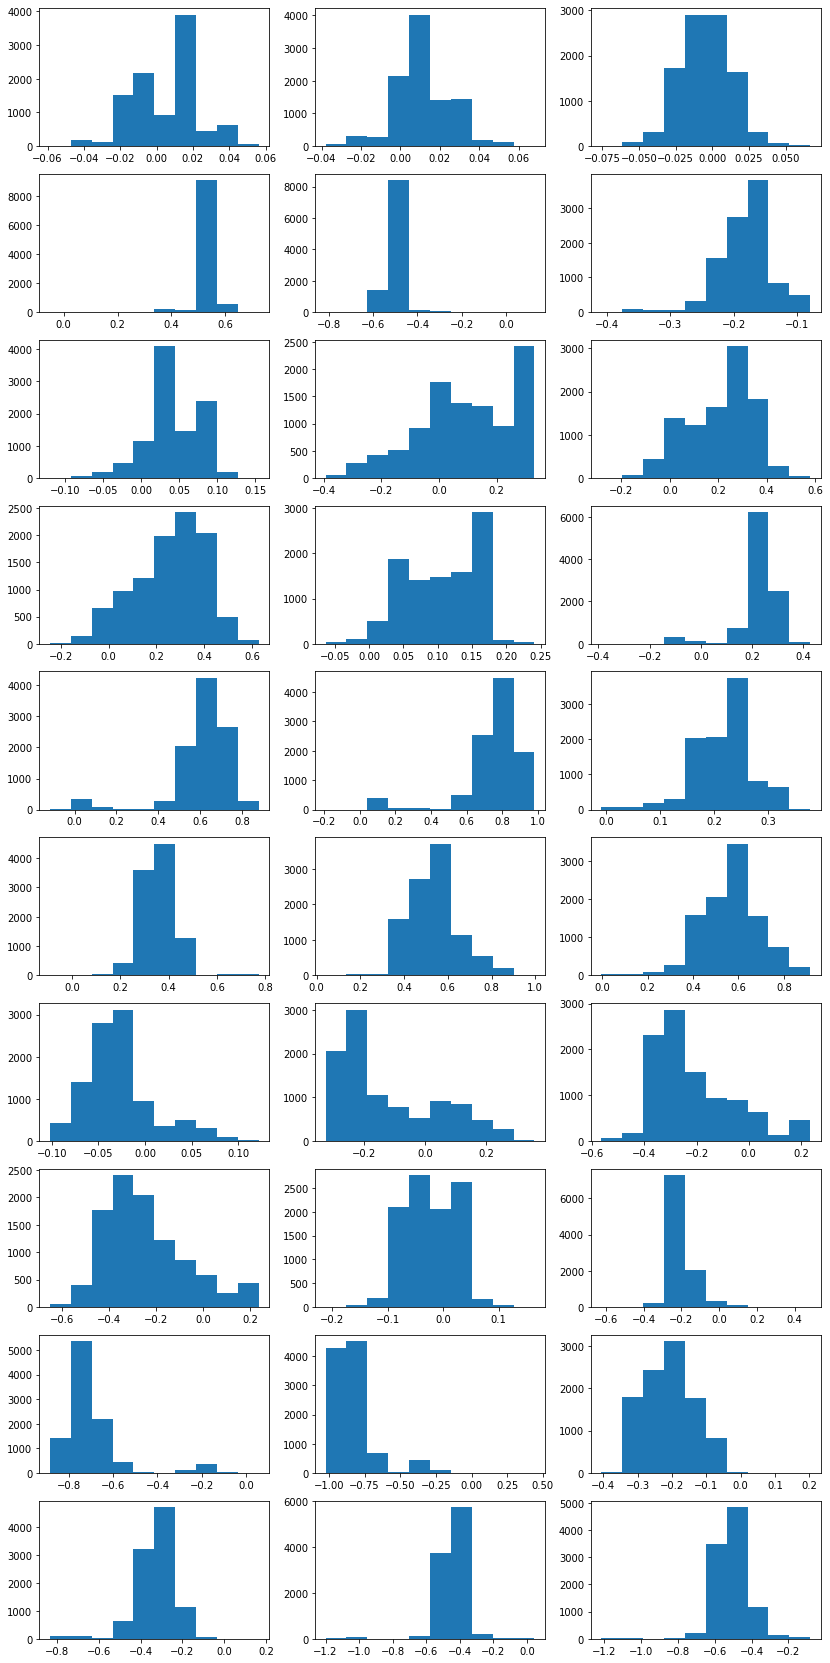

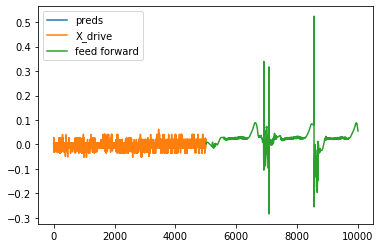

In [4]:
ff = scaler.inverse_transform(ff_normed)
preds = scaler.inverse_transform(preds)

print(preds.shape, X_drive.shape, X_drive_.shape, ff.shape)
diff = preds[:,0,:]-X_drive[0,:,:]
fig, axes = plt.subplots(10, 3, figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.hist(diff[:,ang])#,bins=40);
    
plt.figure()
plt.plot(np.arange(5000), preds[-5000:,0,0], label='preds')
plt.plot(np.arange(5000), X_drive[0,-5000:,0], label='X_drive')
plt.plot(np.arange(5000,10000), ff[:,0], label='feed forward'); #0th angle
plt.legend()

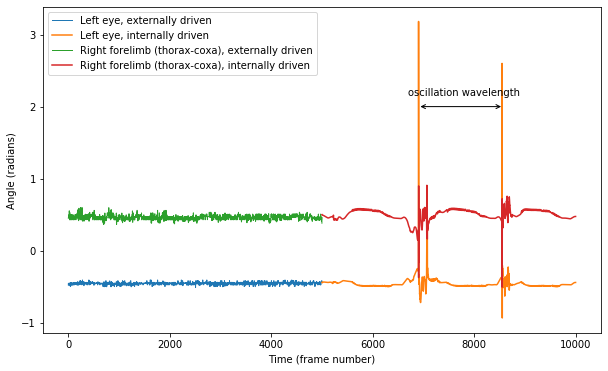

In [66]:
ang=1
num_forward = 5000
ff = scaler.inverse_transform(ff_normed)
preds = scaler.inverse_transform(preds)
plt.figure(figsize=(10,6))
plt.plot(np.arange(num_forward), X_drive[0,-num_forward:,ang],linewidth=1 ,label='Left eye, externally driven')
plt.plot(np.arange(num_forward,2*num_forward), ff[:,ang], label='Left eye, internally driven'); #0th angle
plt.legend()
ang=6
plt.plot(np.arange(num_forward), X_drive[0,-num_forward:,ang],linewidth=1 ,label='Right forelimb (thorax-coxa), externally driven')
plt.plot(np.arange(num_forward,2*num_forward), ff[:,ang], label='Right forelimb (thorax-coxa), internally driven'); #0th angle
#plt.axvline(num_forward+1900, color='black', linestyle='dashed', label='$τ_s$, time to reach steady state')
plt.annotate(s = '', xy=(num_forward+1900, 2), xytext=(num_forward+3570, 2),arrowprops=dict(mutation_scale = 10,
                                                                                            arrowstyle='<->'))
plt.annotate(s = 'oscillation wavelength', xy =(num_forward+1700, 2.15))#2735, 2.1))
plt.legend()
plt.xlabel('Time (frame number)')
plt.ylabel('Angle (radians)')
plt.savefig('steady_state_graph[3l].png')

In [18]:
import heapq
heapq.nlargest(2, ff[:,1])

[3.1826383455949934, 2.599974798698505]

In [19]:
print(np.where(ff[:,1] == ff[:,1].max())[0])
print(np.where(ff[:,1] == 2.599974798698505)[0])

[1904]
[3550]


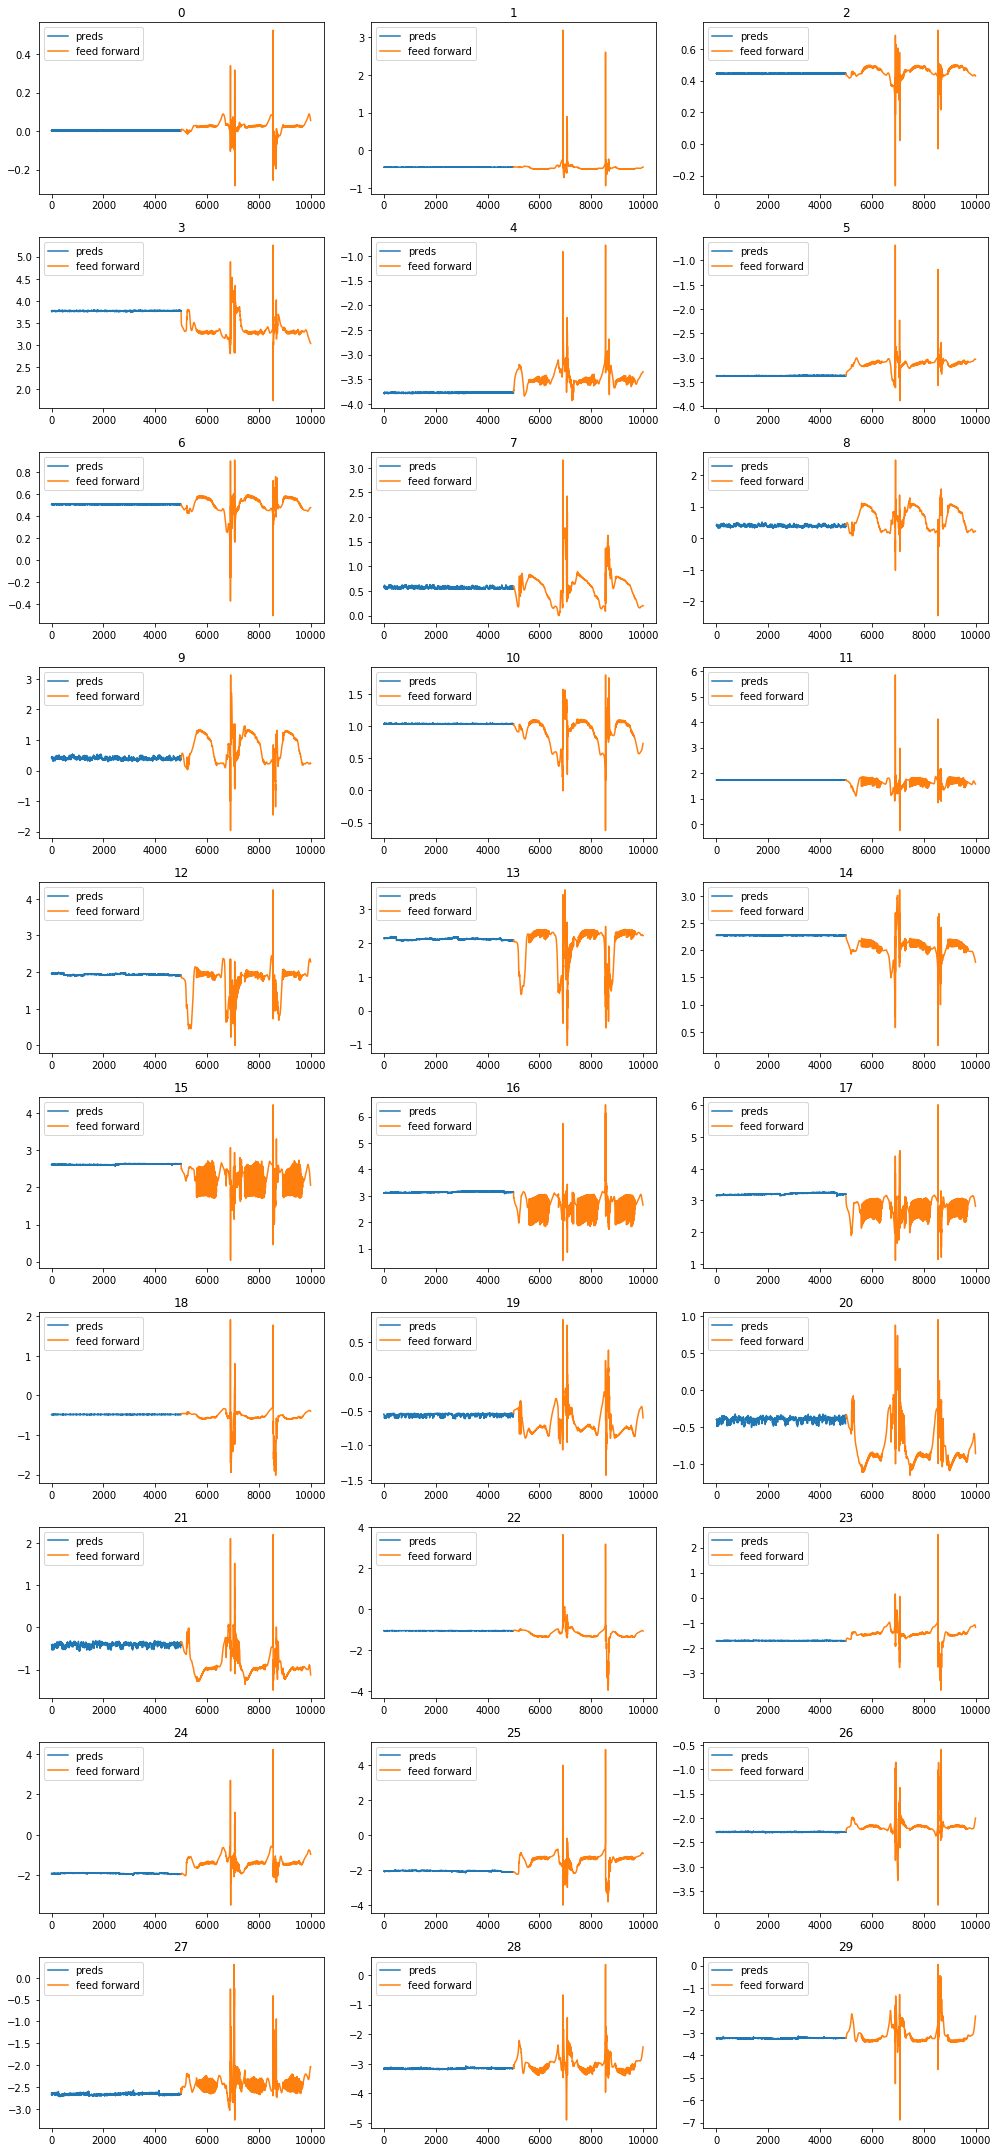

In [5]:
preds_rewind = -5000
fig, axes = plt.subplots(10,3,figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.plot(np.arange(-preds_rewind), preds[preds_rewind:,0,ang], label='preds')
    ax.plot(np.arange(-preds_rewind,ff.shape[0]-preds_rewind), ff[:,ang], label='feed forward')
    ax.set_title(str(ang))
    ax.legend()
plt.tight_layout()

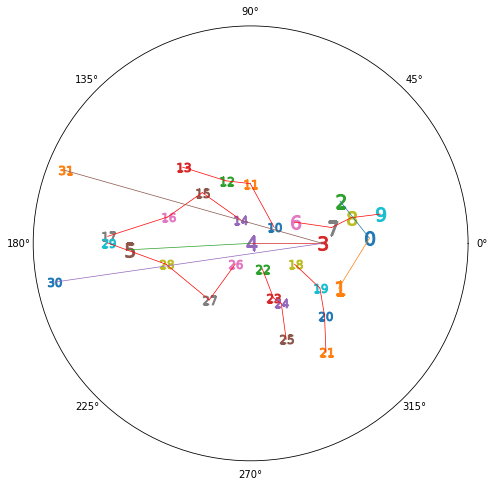

In [16]:
fig, ax = draw_skeleton(ff[-200])
fig.savefig('/home/ishan/honors_thesis/github/feedforwardflies/3layer/steadystatefly.png')

t:   0%|          | 0/500 [00:00<?, ?it/s, now=None]

Moviepy - Building video /home/ishan/honors_thesis/github/feedforwardflies/3layer/feedforwardfly_091712_153058.mp4.
Moviepy - Writing video /home/ishan/honors_thesis/github/feedforwardflies/3layer/feedforwardfly_091712_153058.mp4



Moviepy - Done !
Moviepy - video ready /home/ishan/honors_thesis/github/feedforwardflies/3layer/feedforwardfly_091712_153058.mp4


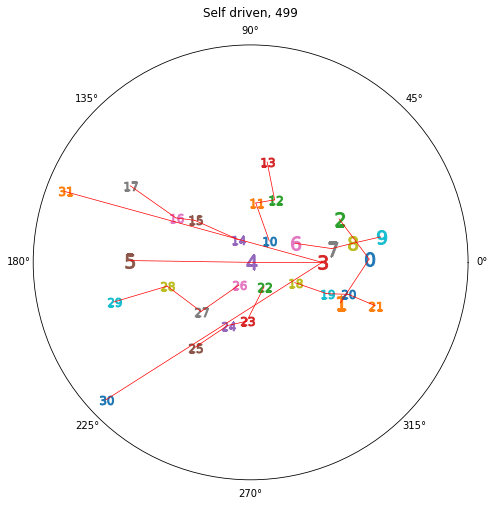

In [89]:
means = np.array([[145.4873612 , 133.85781315, 133.67147231, 126.58415065,
         97.8499675 ,  49.04866306, 115.03435667, 126.57664241,
        136.6654787 , 147.54284296, 104.14832639,  98.08537269,
         97.5099163 ,  93.44100222,  92.59418426,  80.12077111,
         67.43725833,  46.79131352, 115.27751259, 126.66277787,
        136.48709333, 147.22914222, 104.19417769,  98.32634593,
         97.87074148,  94.08399361,  92.70216287,  80.31333463,
         67.70918454,  47.12081435,  18.57976667,  18.75787278],
       [ 94.9058512 ,  78.1094025 , 111.35902611,  94.62192528,
         94.47558787,  93.8548138 , 103.76169704, 110.83637648,
        109.35607269, 113.65153019, 103.97928528, 118.41667648,
        121.39174278, 135.12658296, 103.38936426, 116.27441046,
        111.59319704, 120.60877898,  85.77009241,  78.37048722,
         79.6991313 ,  75.19082435,  85.21323407,  70.76826157,
         67.4492088 ,  53.65891204,  85.60276287,  72.56368139,
         76.95799972,  67.81673   ,  81.54497037, 106.54920185]])
x_means = means[0,:] - means[0,4]
y_means = means[1,:] - means[1,4]
mean_lngth = np.sqrt(x_means**2 + y_means**2)
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
from tqdm import tqdm
try:
    tqdm._instances.clear()
except:
    pass
fps = 100
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
linewidth=0.7
color='red'
def make_frame(i):
    t = int(i*100)
    ax.clear()

    if t<ext_shape:
        arr = preds.squeeze()[t]
        ax.set_title('Externally driven, '+str(t))

    else:
        arr = ff[t-ext_shape]
        ax.set_title('Self driven, '+str(t))
        
    ja_ = np.zeros(32)
    ja_[:30] = arr[:]
    ja_[30] = arr[3]
    ja_[31] = arr[4]
    ja_[3] = 0
    ja_[4] = 0
    for p in range(6, 9, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(10, 13, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(14, 17, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(18, 21, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(22, 25, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    for p in range(26, 29, 1):
        ax.plot([ja_[p],ja_[p+1]], [mean_lngth[p],mean_lngth[p+1]], color='red', linewidth=linewidth)
    ax.plot([ja_[2],ja_[0]], [mean_lngth[2],mean_lngth[0]], linewidth=linewidth, color='r')
    ax.plot([ja_[1],ja_[0]], [mean_lngth[1],mean_lngth[0]], linewidth=linewidth, color='r')
    ax.plot([ja_[5],ja_[4]], [mean_lngth[5],mean_lngth[4]], linewidth=linewidth, color='r')
    ax.plot([ja_[4],ja_[3]], [mean_lngth[4],mean_lngth[3]], linewidth=linewidth, color='r')
    ax.plot([ja_[30],ja_[3]], [mean_lngth[30],mean_lngth[3]], linewidth=linewidth, color='r')
    ax.plot([ja_[31],ja_[3]], [mean_lngth[31],mean_lngth[3]], linewidth=linewidth, color='r')
    for i in range(32):
        ax.scatter(ja_[i], mean_lngth[i], marker='$' + str(i)+ '$', s=200)
    ax.set_yticklabels([])
    #ax.set_xticklabels([])
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    return mplfig_to_npimage(fig)
animation = VideoClip(make_frame, duration=5)
animation.write_videofile('/home/ishan/honors_thesis/github/feedforwardflies/3layer/feedforwardfly_{}.mp4'.format(dset_name), fps=100, audio=False, threads=4)

In [81]:
preds.squeeze().shape, dset_name

((133, 30), '091712_153058')